In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# 1. Derivative

In [2]:
def f(x):
    return x**2

In [3]:
def plot(f, x0):
    x = np.linspace(-5, 5, 100)
    y = f(x)
    y0 = f(x0)
    plt.figure(figsize=(8, 8))
    plt.plot(x, y, 'b')
    plt.plot(x0, y0, 'ro')
    plt.show()

$$ \frac{df}{dx} = f'(x) \approx \frac{f(x + \Delta x) - f(x)}{\Delta x}, \quad \Delta x \approx 0$$, 

VD: $f(x) = x^2$
\begin{align}
f'(x) &\approx \frac{(x + \Delta x)^2 - x^2}{\Delta x} \\
&\approx \frac{x^2 + 2 x \Delta x + (\Delta x)^2 - x^2}{\Delta x} \\
&\approx 2x + \Delta x
\end{align}

Cho $\Delta x \rightarrow 0$:
$$ f'(x) = 2x$$

$f'(x) > 0$: $f$ đang tăng, $f'(x) < 0$: $f$ đang giảm. 

**Đi theo hướng $f'(x)$ thì $f$ tăng (đi theo hướng $-f'(x)$ thì $f$ giảm)**

In [4]:
def estimate_derivative(f, x):
    epsilon = 1e-7
    return (f(x + epsilon) - f(x)) / epsilon

* Thuật toán Gradient Descent phiên bản 1D:

Initialize $x = x_0$ arbitrarily

Repeat

$x := x - \eta f'(x)$

Until termination criteria is met

In [5]:
x = 4.5
eta = 0.05

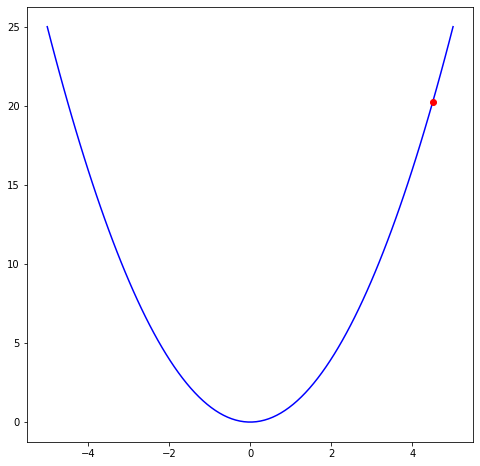

x = 4.5
f(x) = 20.25


In [6]:
# chạy đi chạy lại cell này để converge về minimum
plot(f, x)

print('x = {}'.format(x))
print('f(x) = {}'.format(f(x)))

x = x - eta * estimate_derivative(f, x)

# 2. Gradient

$$z = f(x, y)$$

Partial derivative:

$$\frac{\partial z}{\partial x} \approx \frac{f(x + \Delta x, y) - f(x, y)}{\Delta x}, \quad \Delta x \approx 0$$
$$\frac{\partial z}{\partial y} \approx \frac{f(x, y + \Delta y) - f(x, y)}{\Delta y}, \quad \Delta y \approx 0$$

Gradient: 

$$\nabla z = (\frac{\partial z}{\partial x}, \frac{\partial z}{\partial y})$$

The gradient can be interpreted as the "direction and rate of fastest increase" (Gradient tại một điểm là một vector chỉ theo hướng tăng nhanh nhất của hàm tại điểm đó)

**Đi theo hướng $\nabla z$ thì $z$ tăng (đi theo hướng $-\nabla z$ thì $z$ giảm)**

In [7]:
def f(x, y):
    return x**2 + y**2

In [8]:
def estimate_gradient(f, x, y):
    epsilon_x = 1e-7
    epsilon_y = 1e-7
    grad_x = (f(x + epsilon_x, y) - f(x, y)) / epsilon_x
    grad_y = (f(x, y + epsilon_y) - f(x, y)) / epsilon_y
    return [grad_x, grad_y]

In [9]:
def plot_2d(f, x0, y0):
    X, Y = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
    X_sparse, Y_sparse = np.meshgrid(np.linspace(-5, 5, 11), np.linspace(-5, 5, 11)) # for plotting gradient
    
    Z = f(X, Y)
    grad_X, grad_Y = estimate_gradient(f, X_sparse, Y_sparse)
    
    plt.figure(figsize=(10, 8))
    plt.pcolormesh(X, Y, Z, cmap='Blues')
    plt.colorbar()
    plt.quiver(X_sparse, Y_sparse, grad_X, grad_Y)
    plt.plot(x0, y0, 'ro')
    plt.show()

* Thuật toán Gradient Descent:

$z = f(x, y) = f(w), w = (x, y)$

Initialize $w$ arbitrarily

Repeat

1. Calculate gradient $\nabla_w z = (\frac{\partial z}{\partial x}, \frac{\partial z}{\partial y})$

2. Update weights $w := w - \eta \nabla_w z$

Until termination criteria is met

In [10]:
x = 3.5
y = 3.0
eta = 0.1

F:\Anaconda3\envs\new_sklearn\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  if __name__ == '__main__':


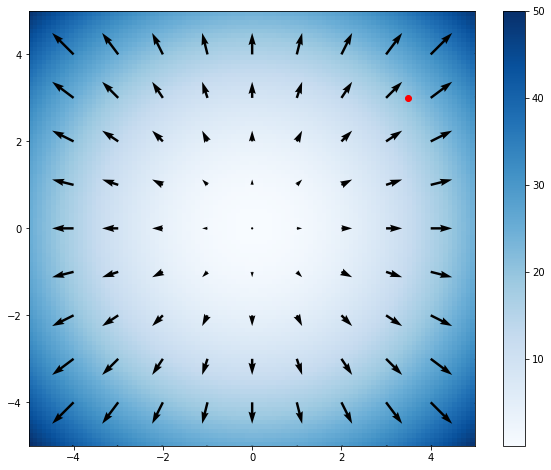

w = (x, y) = (3.50, 3.00)
z = f(w) = 21.25


In [11]:
# chạy đi chạy lại cell này để converge về minimum
plot_2d(f, x, y)

print('w = (x, y) = ({0:.2f}, {1:.2f})'.format(x, y))
print('z = f(w) = {}'.format(f(x, y)))

grad_x, grad_y = estimate_gradient(f, x, y)
x = x - eta * grad_x
y = y - eta * grad_y